In [42]:
import pandas as pd
import numpy as np
from PIL import Image
from PIL import ImageOps
import PIL
import torch, torchvision
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import random
import math
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
from torchvision import datasets, models, transforms
import time
import os
import cv2
from skimage import data, img_as_float
from skimage.measure import compare_ssim as ssim

In [43]:
dir1 = '/home/rliu/ansim/results/test_6-27_orientation_160weights_predict20/'
dir2 = '/home/rliu/ansim/results/test_6-19_orientation_160weights_predict20/'
predict_steps = 15

In [44]:
def psnr(img1, img2):
    mse = np.mean( (img1 - img2) ** 2 )
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

In [45]:
dir1 + '%0.4d/target/target%0.4d.png'% (100,3)

'/home/rliu/ansim/results/test_6-27_orientation_160weights_predict20/0100/target/target0003.png'

In [46]:
folder_num1 = len(next(os.walk(dir1))[1])

In [47]:
folder_num1 = 200
psnr_sum_1 = []
ssim_sum_1 = []
for i in range(predict_steps):
    psnr_step = 0
    ssim_step = 0
    for j in range(201,401):
        original_1 = cv2.imread(dir1 + '%0.4d/target/target_1_%0.4d.png'% (j,i),0)
        contrast_1 = cv2.imread(dir1 + '%0.4d/predicted/predicted_1_%0.4d.png'% (j,i),0)
        psnr_1=psnr(original_1,contrast_1)
        ssim_noise_1 = ssim(original_1, contrast_1, data_range=contrast_1.max() - contrast_1.min())
        
        original_2 = cv2.imread(dir1 + '%0.4d/target/target_2_%0.4d.png'% (j,i),0)
        contrast_2 = cv2.imread(dir1 + '%0.4d/predicted/predicted_2_%0.4d.png'% (j,i),0)
        psnr_2=psnr(original_2,contrast_2)
        ssim_noise_2 = ssim(original_2, contrast_2, data_range=contrast_2.max() - contrast_2.min())
    
        psnr_step += psnr_1 + psnr_2
        ssim_step += ssim_noise_1 + ssim_noise_2
    ssim_step = ssim_step / (2 * folder_num1)
    psnr_step = psnr_step / (2 * folder_num1)
    ssim_sum_1.append(ssim_step)
    psnr_sum_1.append(psnr_step)
    
folder_num2 = 200
psnr_sum_2 = []
ssim_sum_2 = []
for i in range(predict_steps):
    psnr_step = 0
    ssim_step = 0
    for j in range(201,401):
        original_1 = cv2.imread(dir2 + '%0.4d/target/target_1_%0.4d.png'% (j,i),0)
        contrast_1 = cv2.imread(dir2 + '%0.4d/predicted/predicted_1_%0.4d.png'% (j,i),0)
        psnr_1=psnr(original_1,contrast_1)
        ssim_noise_1 = ssim(original_1, contrast_1, data_range=contrast_1.max() - contrast_1.min())
        
        original_2 = cv2.imread(dir2 + '%0.4d/target/target_2_%0.4d.png'% (j,i),0)
        contrast_2 = cv2.imread(dir2 + '%0.4d/predicted/predicted_2_%0.4d.png'% (j,i),0)
        psnr_2=psnr(original_2,contrast_2)
        ssim_noise_2 = ssim(original_2, contrast_2, data_range=contrast_2.max() - contrast_2.min())
    
        psnr_step += psnr_1 + psnr_2
        ssim_step += ssim_noise_1 + ssim_noise_2
    ssim_step = ssim_step / (2 * folder_num2)
    psnr_step = psnr_step / (2 * folder_num2)
    ssim_sum_2.append(ssim_step)
    psnr_sum_2.append(psnr_step)

<Figure size 432x288 with 0 Axes>

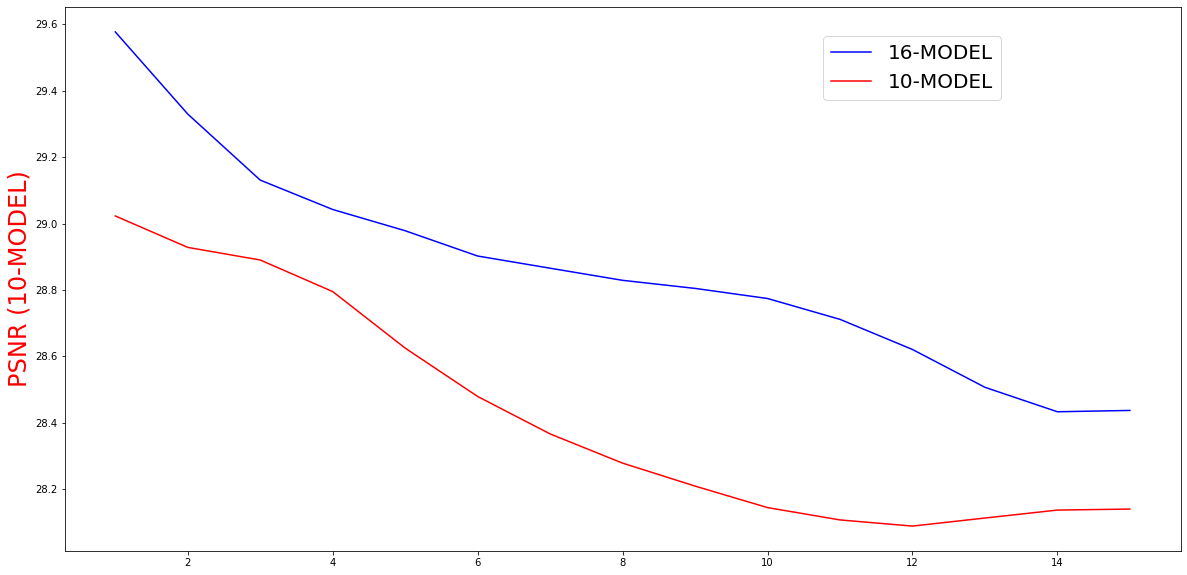

In [48]:
# f = plt.figure(1)
# plt.plot(np.arange(1, predict_steps+1), psnr_sum_1, label='dir1')
# f.show()

g = plt.figure(2)
# plt.plot(np.arange(1, predict_steps+1), psnr_sum_2, label='dir2')
# g.show()

fig = plt.figure(figsize = (20,10))
ax1 = fig.add_subplot(111)
ax1.plot(np.arange(1, predict_steps+1), psnr_sum_1, 'b-', label='16-MODEL')
ax1.set_ylabel('PSNR (16-MODEL)', color='b', fontsize=24)
# plt.legend(['raw images'])
plt.legend(loc=[0.68,0.9], fontsize=20)

# ax2 = ax1.twinx()
ax1.plot(np.arange(1, predict_steps+1), psnr_sum_2, 'r-', label='10-MODEL')
ax1.set_ylabel('PSNR (10-MODEL)', color='r', fontsize=24)
plt.legend(loc=[0.68,0.83], fontsize=20)


for tl in ax2.get_yticklabels():
    tl.set_color('r')

# plt.legend()

<Figure size 432x288 with 0 Axes>

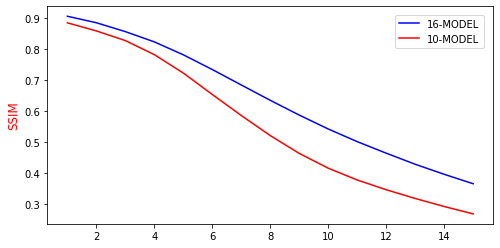

In [49]:
g = plt.figure(2)
# plt.plot(np.arange(1, predict_steps+1), psnr_sum_2, label='dir2')
# g.show()

fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(111)
ax1.plot(np.arange(1, predict_steps+1), ssim_sum_1, 'b-', label='16-MODEL')
ax1.set_ylabel('SSIM', color='b', fontsize=24)
# plt.legend(['raw images'])
plt.legend(loc=[0.78,0.88], fontsize=20)

# ax2 = ax1.twinx()
ax1.plot(np.arange(1, predict_steps+1), ssim_sum_2, 'r-', label='10-MODEL')
ax1.set_ylabel('SSIM', color='r', fontsize=12)
plt.legend(loc=[0.78,0.81], fontsize=10)


for tl in ax2.get_yticklabels():
    tl.set_color('r')